In [1]:
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import accuracy_score

import seaborn as sns

In [2]:
reviews = pd.read_csv('yelp_aug.csv')
reviews.head(2)

,Unnamed: 0,text,stars
0,0,My wife took me here on my birthday for breakf...,1
1,1,I have no idea why some people give bad review...,1


In [3]:
reviews['stars'].value_counts()

1    6863
0    6274
Name: stars, dtype: int64

<AxesSubplot:>

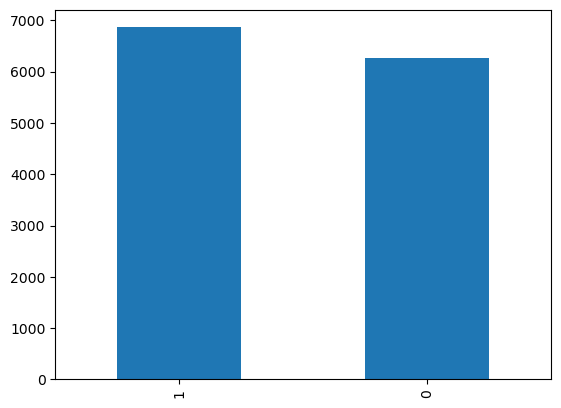

In [4]:
reviews['stars'].value_counts().plot(kind='bar')

all stars 4 and 5 are positive, others are negative


In [5]:
max_features = 6000
# we will use the Tokenizer class: create a word-to-index dictionary. In the word-to-index dictionary
tokenizer = Tokenizer(num_words=max_features, split = ' ')
tokenizer.fit_on_texts(reviews['text'].values)

#to convert sentences into vector /numbers
x = tokenizer.texts_to_sequences(reviews['text'].values)
x = pad_sequences(x)

y = reviews['stars']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, shuffle=True
)


In [7]:
print("shape of X_train:", x_train.shape)
print("shape of X_test:", x_test.shape)

shape of X_train: (9195, 931)
shape of X_test: (3942, 931)


In [8]:
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of y_train: (9195,)
shape of y_test: (3942,)


In [9]:
print(tf.__version__)

2.11.0


In [10]:
import keras
keras.backend.set_image_data_format("channels_last")

In [11]:
#Create RNN model
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 128, input_length=x_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(196))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))
  

2023-04-20 07:24:26.667804: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [12]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 931, 128)          768000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 931, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dropout (Dropout)           (None, 196)               0         
                                                                 
 dense (Dense)               (None, 100)               19700     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                        

In [13]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [14]:
from keras.callbacks import EarlyStopping

early_callback = EarlyStopping(monitor='loss', patience=3)

In [15]:
model.fit(x_train, y_train, validation_split = 0.2, verbose = 1, callbacks=[early_callback], epochs=30)

Epoch 1/30
230/230 [==============================] - 358s 2s/step - loss: 0.5887 - accuracy: 0.6884 - val_loss: 0.4462 - val_accuracy: 0.7939
Epoch 2/30
230/230 [==============================] - 352s 2s/step - loss: 0.3644 - accuracy: 0.8521 - val_loss: 0.4727 - val_accuracy: 0.8200
Epoch 3/30
230/230 [==============================] - 354s 2s/step - loss: 0.2785 - accuracy: 0.8903 - val_loss: 0.4398 - val_accuracy: 0.8352
Epoch 4/30
230/230 [==============================] - 353s 2s/step - loss: 0.1892 - accuracy: 0.9262 - val_loss: 0.4433 - val_accuracy: 0.8178
Epoch 5/30
230/230 [==============================] - 353s 2s/step - loss: 0.1244 - accuracy: 0.9588 - val_loss: 0.5196 - val_accuracy: 0.8423
Epoch 6/30
230/230 [==============================] - 352s 2s/step - loss: 0.1018 - accuracy: 0.9652 - val_loss: 0.6623 - val_accuracy: 0.8358
Epoch 7/30
230/230 [==============================] - 356s 2s/step - loss: 0.0942 - accuracy: 0.9664 - val_loss: 0.6449 - val_accuracy: 0.8042

In [16]:
history = model.history

In [18]:
import numpy as np

In [19]:
#To test the accuracy score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(accuracy_score(y_test, y_pred_classes))

124/124 [==============================] - 57s 463ms/step
0.8437341451040081


In [21]:
import matplotlib.pyplot as plt

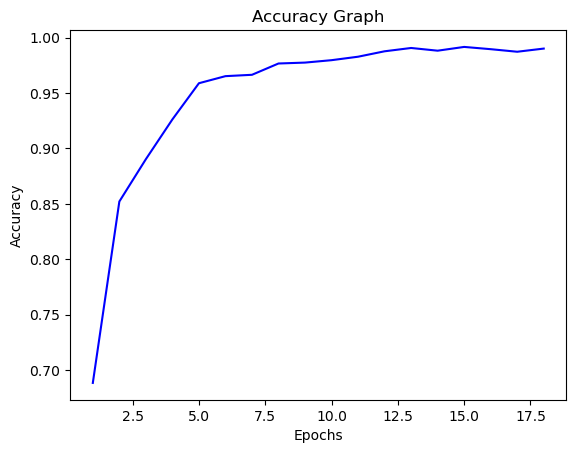

In [22]:
#To plot the accuracy graph 
acc = history.history['accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'b', label = 'Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.legend()
plt.show()

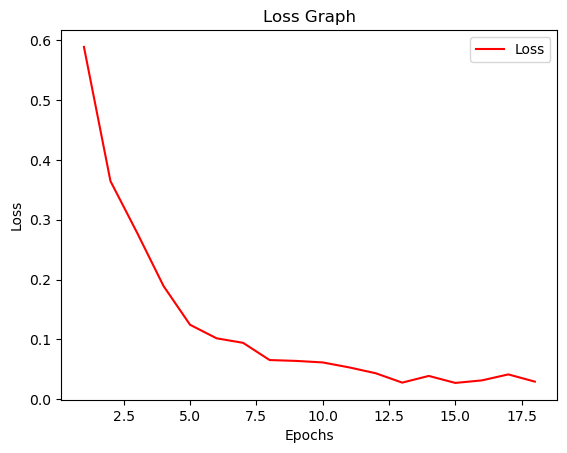

In [23]:
#To plot the Loss graph 
loss = history.history['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'r', label = 'Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

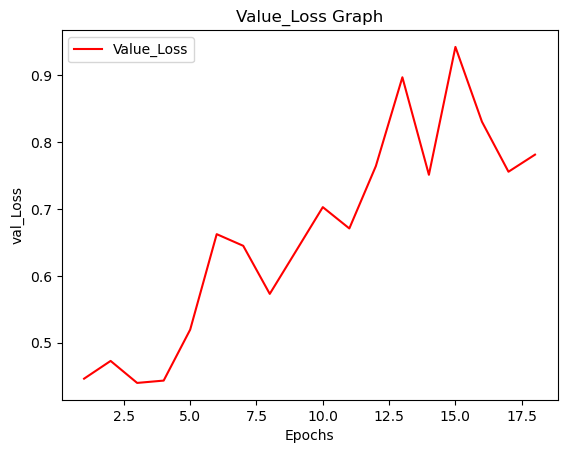

[0.4462010860443115, 0.47274038195610046, 0.43983545899391174, 0.44332432746887207, 0.5195504426956177, 0.662329912185669, 0.6449084877967834, 0.5730059742927551, 0.6377596855163574, 0.7027546167373657, 0.6708644032478333, 0.7641139030456543, 0.8969809412956238, 0.7511194944381714, 0.9423769116401672, 0.8305078744888306, 0.7557016015052795, 0.7812681198120117]


In [24]:
#To plot the val_Loss graph 
val_loss = history.history['val_loss']
epochs = range(1,len(val_loss)+1)
plt.plot(epochs, val_loss, 'r', label = 'Value_Loss')
plt.title('Value_Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('val_Loss')
plt.legend()
plt.show()
print(history.history['val_loss'])

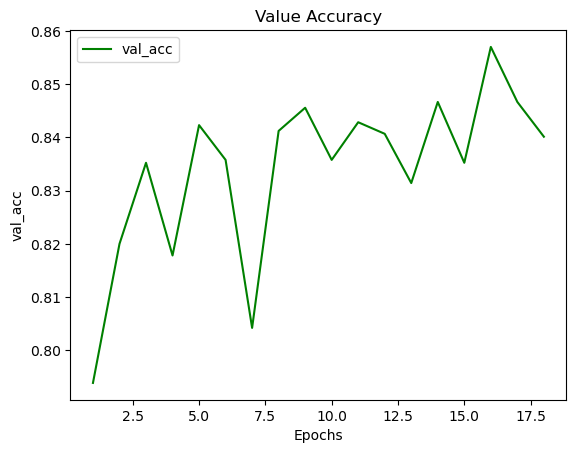

[0.7939097285270691, 0.8200109004974365, 0.8352365493774414, 0.817835807800293, 0.842305600643158, 0.8357803225517273, 0.804241418838501, 0.8412180542945862, 0.8455682396888733, 0.8357803225517273, 0.8428493738174438, 0.8406742811203003, 0.8314301371574402, 0.8466557860374451, 0.8352365493774414, 0.856987476348877, 0.8466557860374451, 0.8401305079460144]


In [25]:
#To plot the Loss graph 
val_acc = history.history['val_accuracy']
epochs = range(1,len(val_acc)+1)
plt.plot(epochs, val_acc, 'g', label = 'val_acc')
plt.title('Value Accuracy')
plt.xlabel('Epochs')
plt.ylabel('val_acc')
plt.legend()
plt.show()
print(history.history['val_accuracy'])

In [26]:
#Testing model on new input
sample = "Their service is not good"
sample_item = [sample]
sample_item = tokenizer.texts_to_sequences(sample_item)
sample_item = pad_sequences(sample_item, maxlen=len(sample) + 1)

print(sample_item)
sentiment = model.predict(sample_item,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 46 58  9
  22 27]]
1/1 - 1s - 502ms/epoch - 502ms/step
negative


In [27]:
#Testing model on new input
sample = "I liked this service"
sample_item = [sample]
sample_item = tokenizer.texts_to_sequences(sample_item)
sample_item = pad_sequences(sample_item, maxlen=len(sample) + 1)

print(sample_item)
sentiment = model.predict(sample_item,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3
  404  16  58]]
1/1 - 0s - 23ms/epoch - 23ms/step
positive


In [28]:
import joblib

In [29]:
joblib.dump(model, 'sentiment-analysis.pkl')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......dropout_1
.........vars
......embedding
.........vars
............0
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......spatial_dropout1d
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
metadata.json                                  2023-04-20 09:16:02           64
config.json          

['sentiment-analysis.pkl']